In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

### Fashion mnist model based CNN

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#### tensorflow

In [30]:
# 다음 배치를 읽어오기 위한 next_batch 함수 정의
def next_batch(num, data, labels):
    '''
    `num` 개수 만큼의 랜덤한 샘플들과 레이블들을 리턴합니다.
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [40]:
data, labels=next_batch(batch_size, train_images, train_labels)

In [42]:
print(data.shape)
print(labels.shape)

(100, 28, 28)
(100, 10)


In [31]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [32]:
train_images.shape #(60000, 28, 28)
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

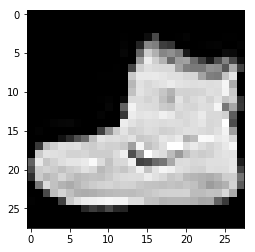

In [33]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap="gray")

In [34]:
# train,test labels를 원핫인코딩로 변환해주기 
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [35]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [53]:
tf.reset_default_graph() # 그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32,[None, 28*28])
ximg=tf.reshape(x,[-1,28,28,1])
y=tf.placeholder(tf.float32,[None,10])

keep_prob=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([3,3,1,32]))
L1=tf.nn.conv2d(ximg, w1, strides=[1, 1, 1 ,1], padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

w2=tf.Variable(tf.random_normal([3,3,32,64]))
L2=tf.nn.conv2d(L1, w2, strides=[1, 1, 1 ,1], padding='SAME') 
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2_flat=tf.reshape(L2,[-1,7*7*64])


w3=tf.get_variable("w3", shape=[7*7*64,10], 
                   initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L2_flat,w3)+b

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [54]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(train_images.shape[0]/batch_size)
    for i in range(total_batch):
        batchxs,batchys=next_batch(batch_size, train_images, train_labels)
        batchxs=batchxs.reshape(-1,28*28)
        myfeed={x:batchxs, y:batchys} # 모델을 만들때는 데이터 일부만 사용
        cv,_=sess.run([cost,train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:',"{:.9f}".format(avg_cost))
    
c_pre=tf.equal(tf.argmax(logits,1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
test_images=test_images.reshape(-1,28*28)
print('acc: %f' % sess.run(acc, feed_dict={x:test_images,
                                      y:test_labels})) # 실행할때는 데이터 전체 다 넣기

cost: 470.711987686
cost: 168.600022799
cost: 101.212911992
cost: 67.469752304
cost: 52.046439947
cost: 39.485876293
cost: 32.080201880
cost: 25.681188122
cost: 20.626867144
cost: 17.744455191
cost: 15.142245347
cost: 13.670440228
cost: 11.103231300
cost: 10.890002670
cost: 9.393209629
acc: 0.851700
